In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("ML_datasets\Enjoy_sports.csv")
df.head()

,Sky,AirTemp,Humidity,Wind,Water,Forecast,EnjoySport
0,Sunny,Warm,Normal,Strong,Warm,Same,Yes
1,Sunny,Warm,High,Strong,Warm,Same,Yes
2,Rainy,Cold,High,Strong,Warm,Change,No
3,Sunny,Warm,High,Strong,Cool,Change,Yes


In [11]:
def finds(df):
    pos_rows=df[df["EnjoySport"]=='Yes']
    pos_examples=pos_rows.iloc[:,:-1].values
    hypo=["#"]*len(pos_examples[0])
    for example in pos_examples:
        for i in range(len(hypo)):
            if hypo[i]=="#":
                hypo[i]=example[i]
            elif hypo[i]!=example[i]:
                hypo[i]="?"
    return hypo

In [12]:
print(finds(df))

['Sunny', 'Warm', '?', 'Strong', '?', '?']


In [13]:
#candidate
import pandas as pd

In [14]:
df=pd.read_csv("ML_datasets\Enjoy_sports.csv")
data = df.values.tolist()

In [21]:
def candi(data):
    s=["$"]*(len(data[0])-1)
    G=[["?"]*(len(data[0])-1)]
    for row in data:
        attributes,label=row[:-1],row[-1]
        if label=="Yes":
            for i in range(len(s)):
                if s[i]=="$":
                    s[i]=attributes[i]
                elif s[i]!=attributes[i]:
                    s[i]="?"
            G=[ g for g in G if all(g[i]=="?" or g[i]==s[i] for i in range(len(s)))]
        elif label=="No":
            new_G=[]
            for g in G:
                for i in range(len(g)):
                    new_hypo=g[:]
                    new_hypo[i]=attributes[i]
                    new_G.append(new_hypo)
            G=new_G
    return s,G
        

In [23]:
S_final,G_final=candi(data)

print(S_final)
print(G_final)

['Sunny', 'Warm', '?', 'Strong', '?', '?']
[['?', '?', '?', 'Strong', '?', '?']]


In [24]:
#Linear Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [26]:
df=pd.read_csv("ML_datasets\salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [29]:
x=df[["YearsExperience"]]
y=df["Salary"]


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

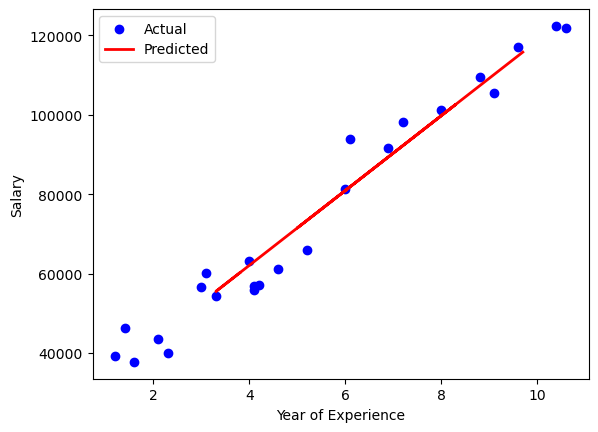

In [33]:
plt.scatter(x_train,y_train,color="blue",label="Actual")
plt.plot(x_test,ypred,color="red",linewidth=2,label="Predicted")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [35]:
print("MeanSquarederror",mean_squared_error(ypred,y_test))

MeanSquarederror 49830096.855908334


In [41]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix
#import matplotlib.pyplot as plt

In [42]:
df=pd.read_csv("ML_datasets/PlayTennis.csv")
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [43]:
x=pd.get_dummies(df[["Outlook","Temperature","Humidity","Wind"]])
y=df["Play Tennis"].map({'Yes':1,'No':0})
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [44]:
dt=DecisionTreeClassifier(criterion='entropy')

dt.fit(x_train,y_train)
ypred=dt.predict(x_test)

In [45]:
print("MeanSquarederror",mean_squared_error(ypred,y_test))
print("Accuracy Score",accuracy_score(ypred,y_test))
print("Confusion Matrix",confusion_matrix(ypred,y_test))

MeanSquarederror 0.0
Accuracy Score 1.0
Confusion Matrix [[1 0]
 [0 2]]


In [59]:
#MLPClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix,classification_report

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [60]:
df=pd.read_csv('ML_datasets\iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [61]:
x=df.iloc[:,0:4]
y=df.select_dtypes(include=[object])
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [62]:
le=preprocessing.LabelEncoder()
y=y.apply(le.fit_transform)

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [64]:
MLP=MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=2000)
MLP.fit(x_train,y_train.values.ravel())
ypred=MLP.predict(x_test)

In [65]:
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))
print(accuracy_score(y_test,ypred))

[[14  1  0]
 [ 0 14  1]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.88      0.93      0.90        15
           2       0.93      0.93      0.93        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

0.9333333333333333


In [66]:
#Knn Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix,classification_report

In [67]:
df=pd.read_csv("ML_datasets\salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [68]:
x=df[["YearsExperience"]]
y=df["Salary"]

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [71]:
knn=neighbors.KNeighborsRegressor(n_neighbors=3)

In [72]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [74]:
ypred=knn.predict(x_test)
print(mean_squared_error(ypred,y_test))

30279360.94444446


In [75]:
#Hirerchial Clustering
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
df=pd.read_csv("ML_datasets\mall.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [77]:
data=df.iloc[:,[3,4]].values

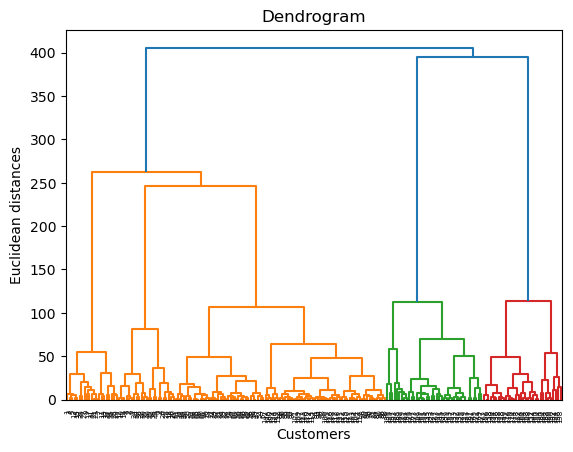

In [80]:
import scipy.cluster.hierarchy as sch
dendo=sch.dendrogram(sch.linkage(data,method="ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()               

In [81]:
from sklearn.cluster import AgglomerativeClustering
agg_hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=agg_hc.fit_predict(data)

C:\Users\chann\anaconda2\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


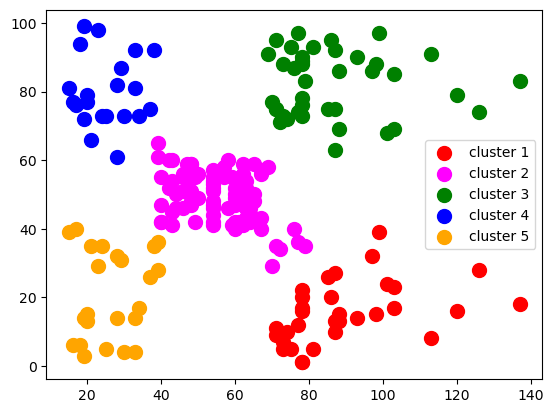

In [83]:
plt.scatter(data[y_hc==0,0],data[y_hc==0,1],s=100,color="red",label="cluster 1")
plt.scatter(data[y_hc==1,0],data[y_hc==1,1],s=100,color="magenta",label="cluster 2")
plt.scatter(data[y_hc==2,0],data[y_hc==2,1],s=100,color="green",label="cluster 3")
plt.scatter(data[y_hc==3,0],data[y_hc==3,1],s=100,color="blue",label="cluster 4")
plt.scatter(data[y_hc==4,0],data[y_hc==4,1],s=100,color="orange",label="cluster 5")
plt.legend()
plt.show()

In [2]:
#Kmeans Clustering
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


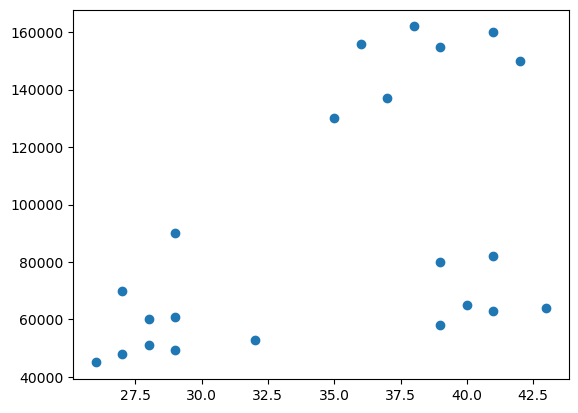

In [4]:
plt.scatter(df.Age,df['Income($)'])

In [7]:
km=KMeans(n_clusters=3)
ypred=km.fit_predict(df[['Age','Income($)']])
print(ypred)


C:\Users\chann\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chann\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 2 2 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 0 0 2]


In [8]:
df['cluster']=ypred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [9]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

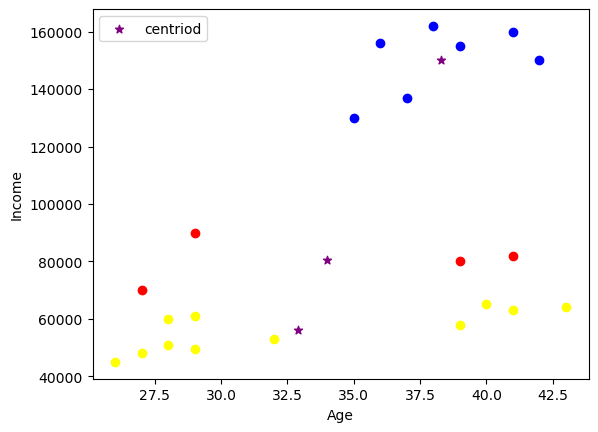

In [11]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='red')
plt.scatter(df2.Age,df2['Income($)'],color='blue')
plt.scatter(df3.Age,df3['Income($)'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',label='centriod',color='purple')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

In [12]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])

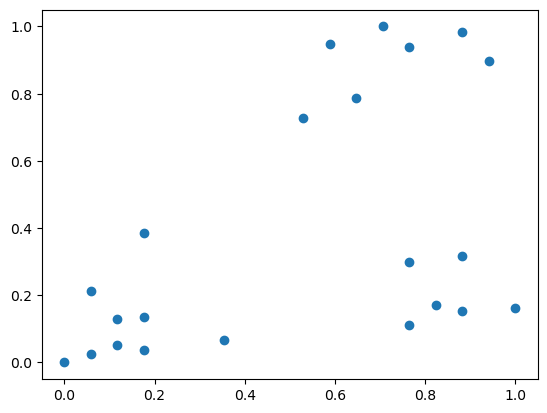

In [13]:
plt.scatter(df.Age,df['Income($)'])

In [14]:
km=KMeans(n_clusters=3)
ypred=km.fit_predict(df[['Age','Income($)']])
print(ypred)

C:\Users\chann\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chann\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2]


In [16]:
df['cluster']=ypred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [17]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

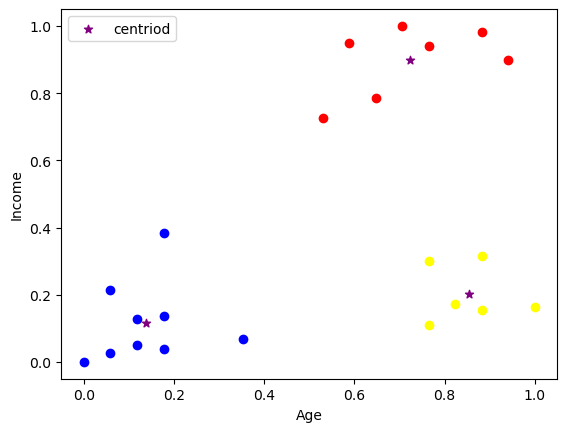

In [18]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='red')
plt.scatter(df2.Age,df2['Income($)'],color='blue')
plt.scatter(df3.Age,df3['Income($)'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',label='centriod',color='purple')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

In [20]:
#perceptron
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [21]:
b_cancer=load_breast_cancer()
X=b_cancer.data
Y=b_cancer.target

In [31]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [41]:
def model(w,b,x):
    if (np.dot(w,x)>=b):
        return 1
    else:
        return 0
        

In [42]:
def predict(w,b,X):
    Y=[]
    for x in X:
        res=model(w,b,x)
        Y.append(res)
    return np.array(Y)

In [43]:
def fit(X,Y,epochs=500,lr=1):
    w=np.ones(X.shape[1])
    b=0
    accuracy={}
    max_accuracy=0
    wt_mat=[]
    for i in range(epochs):
        for x,y in zip(X,Y):
            ypred=model(w,b,x)
            if y==1 and ypred==0:
                w=w+lr*x
                b=b-lr*1
            elif y==0 and ypred==1:
                w=w-lr*x
                b=b+lr*1
        wt_mat.append(w)
        accuracy[i] = accuracy_score(predict(w, b, X), Y)
        if accuracy[i]>max_accuracy:
            max_accuracy=accuracy[i]
            chw=w
            chb=b
    w=chw
    b=chb
    print("Accuracy is ",max_accuracy)
    return np.array(wt_mat),w,b
            

In [45]:
wt_mat,w,b=fit(x_train,y_train,500,1)
ypred=predict(w,b,x_test)

Accuracy is  0.9342723004694836


In [48]:
cr = classification_report(y_test, ypred)
m = confusion_matrix(y_test, ypred)
acc = accuracy_score(ypred, y_test)

print("Classification Report is : ",cr)
print("Confusion Matrix is : ",m)
print("Accuracy Score is : ",acc)

Classification Report is :                precision    recall  f1-score   support

           0       0.98      0.87      0.92        62
           1       0.91      0.99      0.95        81

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

Confusion Matrix is :  [[54  8]
 [ 1 80]]
Accuracy Score is :  0.9370629370629371
